In [1]:
from glob import glob
from pickle import load

pkls = glob('../data/estimator_comparison/*.pkl')

In [2]:
len(pkls), len(pkls) / 72

(59, 0.8194444444444444)

In [3]:
summary = []

def extract_result(result):
    return result[1]['near_eq_estimate'], result[1]['new_estimate']

for fname in pkls:
    with open(fname, 'rb') as f:
        result = load(f)
    summary.append((result[0], extract_result(result)))

In [4]:
summary[0]

(('RVOVR',
  Quantity(value=3.0, unit=femtosecond),
  'configuration',
  'waterbox_constrained'),
 (0.013937687390077724, 6.6036360183752564e-05))

In [5]:
from simtk import unit

In [6]:
import numpy as np

def get_curves(scheme='RVOVR', marginal='configuration'):
    dts = []
    near_eq_estimates = []
    new_estimates = []
    
    
    for (descr, (near_eq_est, new_est)) in summary:
        if descr[0] == scheme and descr[2] == marginal:
            dts.append(descr[1].value_in_unit(unit.femtosecond))
            near_eq_estimates.append(near_eq_est)
            new_estimates.append(new_est)
    
    
    inds = np.argsort(dts)
    sort_by_dt = lambda l : np.array(l)[inds]
    return list(map(sort_by_dt, [dts, near_eq_estimates, new_estimates]))

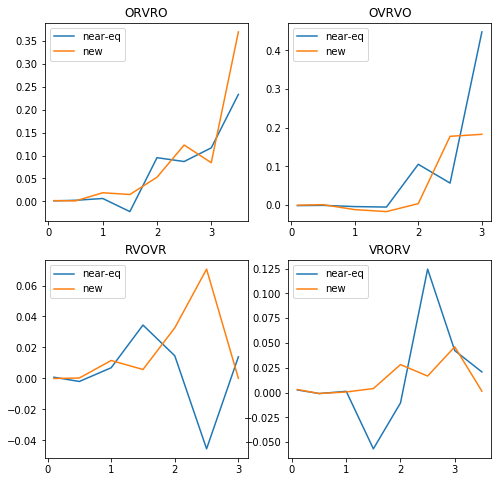

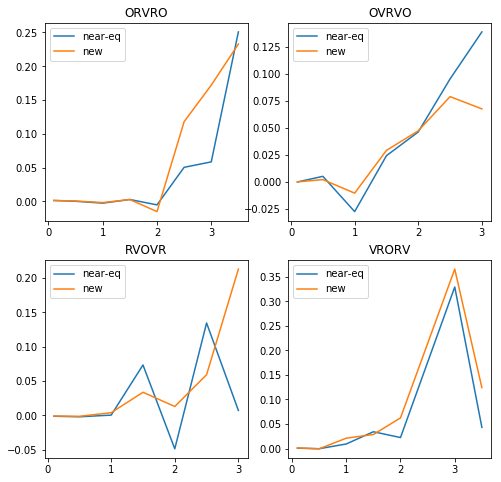

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

def new_figure():
    plt.figure(figsize=(8,8))

def plot_marginal(marginal='configuration'):
    
    
    for i, scheme in enumerate(sorted(['RVOVR', 'OVRVO', 'VRORV', 'ORVRO'])):
        dts, near_eq_estimates, new_estimates = get_curves(scheme, marginal)
        
        plt.subplot(2,2,i+1)
        plt.title(scheme)
        plt.plot(dts, near_eq_estimates, label='near-eq')
        plt.plot(dts, new_estimates, label='new')
        plt.legend(loc='upper left')

        
new_figure()
plot_marginal('configuration')
new_figure()
plot_marginal('full')